<a href="https://colab.research.google.com/github/Untick/InspectrumClinic_RecSys/blob/Tatyana-Nekrasova-folder/Tatyana%20Nekrasova/%D0%9D%D0%B5%D0%BA%D1%80%D0%B0%D1%81%D0%BE%D0%B2%D0%B0_%D0%9F%D1%80%D0%BE%D1%84%D0%BF%D0%B0%D1%82%D0%BE%D0%BB%D0%BE%D0%B3__AutoKeras_%D0%B2%D0%B5%D1%80%D1%81%D0%B8%D1%8F_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.metrics import f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, SpatialDropout1D, BatchNormalization, Embedding, Flatten, Activation, Input, concatenate
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Dense, BatchNormalization, Activation
from tensorflow.keras.activations import relu, sigmoid
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

In [2]:
# Загрузка файла из облака в colab
import gdown
gdown.download('https://storage.yandexcloud.net/terratraineeship/23_InspectrumClinic_RS/datasets/%D0%B4%D0%B0%D1%82%D0%B0%D1%81%D0%B5%D1%82%20%D0%BF%D1%80%D0%BE%D1%84%D0%BF%D0%B0%D1%82%D0%BE%D0%BB%D0%BE%D0%B3%20%D1%87%D0%B0%D1%81%D1%82%D1%8C.xlsx', None, quiet=True)

'%D0%B4%D0%B0%D1%82%D0%B0%D1%81%D0%B5%D1%82%20%D0%BF%D1%80%D0%BE%D1%84%D0%BF%D0%B0%D1%82%D0%BE%D0%BB%D0%BE%D0%B3%20%D1%87%D0%B0%D1%81%D1%82%D1%8C.xlsx'

In [3]:
data = pd.read_excel('/content/%D0%B4%D0%B0%D1%82%D0%B0%D1%81%D0%B5%D1%82%20%D0%BF%D1%80%D0%BE%D1%84%D0%BF%D0%B0%D1%82%D0%BE%D0%BB%D0%BE%D0%B3%20%D1%87%D0%B0%D1%81%D1%82%D1%8C.xlsx')
data.head()

,ДокументПрохождениеМедосмотра,Клиент,КлиентДатаРождения,КлиентПол,КлиентПолПредставление,ДатаЗавершенияМедосмотра,ТипМедосмотра,ТипМедосмотраПредставление,ПсихОсвидетельствование,Контрагент,...,Оториноларингология3_Аудиометрия1_Значение,Оториноларингология3_Аудиометрия1_ЗначениеПредставление,Оториноларингология1_ЖалобыДополнение_Значение,Оториноларингология1_ЖалобыДополнение_ЗначениеПредставление,Стоматология2_ВП2_Значение,Стоматология2_ВП2_ЗначениеПредставление,Терапия2_ЗаключениеФОГК_Значение,Терапия2_ЗаключениеФОГК_ЗначениеПредставление,Офтальмология1_ДвигательныйАппаратГлазДополнение_Значение,Офтальмология1_ДвигательныйАппаратГлазДополнение_ЗначениеПредставление
0,7f41ca7e-7dac-11ec-80fc-0cc47aab8067,c91e3407-b81f-11e9-80cf-0cc47aab8067,1976-10-24,Женский,Женский,2022-01-25,Периодический,Периодический,False,23c173a7-30d9-11e7-80d8-708bcd7f83cd,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2ee1f9ac-83dd-11ec-80fc-0cc47aab8067,1a1a5fea-8b7f-11eb-80e8-0cc47aab8067,1987-11-18,Мужской,Мужской,2022-02-02,Периодический,Периодический,False,a6d559b0-7835-11eb-80e8-0cc47aab8067,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9cbb191e-8e24-11ec-80fe-0cc47aab8067,7fe324e0-fa51-11eb-80f6-0cc47aab8067,1985-09-08,Мужской,Мужской,2022-02-15,Периодический,Периодический,False,a6d559b0-7835-11eb-80e8-0cc47aab8067,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,b8a33910-8eec-11ec-80fe-0cc47aab8067,98f9d761-8d65-11ec-80fe-0cc47aab8067,1988-04-25,Мужской,Мужской,2022-02-16,Периодический,Периодический,False,a6d559b0-7835-11eb-80e8-0cc47aab8067,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0bb0d181-938c-11ec-80fe-0cc47aab8067,009aac7d-7bcf-11eb-80e8-0cc47aab8067,1984-04-17,Мужской,Мужской,2022-02-22,Периодический,Периодический,False,a6d559b0-7835-11eb-80e8-0cc47aab8067,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.shape # кол-во строк и столбцов

(1982, 4587)

## Работа с таблицей

In [5]:
# удалить столбцы, в которых нет ни одного значения
data.dropna(axis=1, how='all', inplace=True)
print(data.shape)


(1982, 3703)


In [6]:
# удалить строки с пустыми значениями в столбце ЗаключениеМК
data.dropna(subset=['ЗаключениеМК'], inplace=True)
print(data.shape)


(1575, 3703)


In [7]:
# удалить ошибочные данные
data = data.drop(data[data['ЗаключениеМК'] == 'машинист бульдозера'].index)
data = data.drop(data[data['ЗаключениеМК'] == 'Газоспасатель'].index)
data = data.drop(data[data['ЗаключениеМК'] == ' Газоспасатель'].index)

In [8]:
# просмотр значений в целевой колонке
data['ЗаключениеМК'].value_counts()

Годен                               1434
ГоденСКоррекциейЗрения               123
ВременноНегоден                        9
НуждаетсяВДообследованииИЛечении       2
ОграниченноГоден                       2
ГоденБезРаботНаВысотах                 1
Name: ЗаключениеМК, dtype: int64

In [9]:
# перенос в новый датасет колонок, котрые на мой взгляд будут влиять на результат
import re

data_1 = data.filter(regex=re.compile(r'ГоденНегоден_ЗначениеПредставление|ВредныеФакторы|ЗаключениеМК|Профессия|Психосвидетельствование|МКБ'))
print(data_1.shape)

(1571, 127)


In [ ]:
# Замена NAN на 0 соответствующего типа
for i in data_1.columns.values.tolist():
    if data_1[i].dtypes==object:
       data_1[i]= data_1[i].fillna('0')
    elif data_1[i].dtypes==int or  data_1[i].dtypes==float:
       data_1[i]= data_1[i].fillna(0)

In [11]:
# преобразование значений в целевой колонке к трем классам
data_1['ЗаключениеМК'] = data_1['ЗаключениеМК'].map({'Годен': 'Годен', 'ГоденСКоррекциейЗрения': 'ОграниченноГоден', 'ВременноНегоден': 'ОграниченноГоден', 'НуждаетсяВДообследованииИЛечении': 'ОграниченноГоден', 'ОграниченноГоден': 'ОграниченноГоден', 'ГоденБезРаботНаВысотах': 'ОграниченноГоден'})
data_1['ЗаключениеМК'].value_counts()

<ipython-input-11-b70b2ebabfa1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1['ЗаключениеМК'] = data_1['ЗаключениеМК'].map({'Годен': 'Годен', 'ГоденСКоррекциейЗрения': 'ОграниченноГоден', 'ВременноНегоден': 'ОграниченноГоден', 'НуждаетсяВДообследованииИЛечении': 'ОграниченноГоден', 'ОграниченноГоден': 'ОграниченноГоден', 'ГоденБезРаботНаВысотах': 'ОграниченноГоден'})


Годен               1434
ОграниченноГоден     137
Name: ЗаключениеМК, dtype: int64

In [12]:
# удаление дублирующей колонки и колонки с значением nan (они нашлись придальнейшей обработке таблицы)
data_1 = data_1.drop('ЗаключениеМКПредставление',  axis=1)
data_1 = data_1.drop('Хирургия3_МКБ101', axis=1)
data_1 = data_1.drop('Хирургия3_ГоденНегоден_ЗначениеПредставление', axis=1)

## Преобразование данных

In [13]:
# преобразование данных в числовые
import numpy as np


In [14]:
# подготовка колонок для перевода категориальных данных в OHE
data_2 = data_1.copy()
data_2.drop(['Профессия', 'ЗаключениеМК', 'ВредныеФакторы'], axis=1, inplace=True)
data_2

,ПсихиатрияНаркология1_МКБ101,ПсихиатрияНаркология1_ГоденНегоден_ЗначениеПредставление,Офтальмология1_МКБ101,Офтальмология1_ГоденНегоден_ЗначениеПредставление,Оториноларингология1_МКБ101,Оториноларингология1_ГоденНегоден_ЗначениеПредставление,ХирургНеИсп1_МКБ101,ХирургНеИсп1_ГоденНегоден_ЗначениеПредставление,Гинекология1_МКБ101,Гинекология1_ГоденНегоден_ЗначениеПредставление,...,Рентгенология1_МКБ102,Рентгенология2_МКБ102,Психиатрия3_МКБ101,Психиатрия3_МКБ102,Психиатрия3_ГоденНегоден_ЗначениеПредставление,Психиатрия4_МКБ101,Психиатрия4_МКБ102,Психиатрия4_ГоденНегоден_ЗначениеПредставление,Оториноларингология3_МКБ101,Оториноларингология3_ГоденНегоден_ЗначениеПредставление
0,Z00.0,Годен,Z00.0,Годен,Z00.0,Годен,Z00.0,Годен,Z00.0,Годен,...,0,0,0,0,0,0,0,0,0,0
1,Z00.0,Годен,Z00.0,Годен,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Z00.0,Годен,H52.1,Годен,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,Z00.0,Годен,Z00.0,Годен,Z00.0,Годен,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,H52.2,Годен,Z00.0,Годен,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1961,Z00.0,Годен,Z00.0,Годен,Z00.0,Годен,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1962,Z00.0,Годен,0,0,Z00.0,Годен,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1972,Z00.0,Годен,Z00.0,Годен,Z00.0,Годен,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1973,Z00.0,Годен,Z00.0,Годен,Z00.0,Годен,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
#Преобразование в OHE
data_2 = pd.get_dummies(data_2)
data_2

,ПсихиатрияНаркология1_МКБ101_0,ПсихиатрияНаркология1_МКБ101_F06.6,ПсихиатрияНаркология1_МКБ101_F06.7,ПсихиатрияНаркология1_МКБ101_F07.0,ПсихиатрияНаркология1_МКБ101_F41.0,ПсихиатрияНаркология1_МКБ101_F98.5,ПсихиатрияНаркология1_МКБ101_R25.1,ПсихиатрияНаркология1_МКБ101_Z00.0,ПсихиатрияНаркология1_ГоденНегоден_ЗначениеПредставление_0,ПсихиатрияНаркология1_ГоденНегоден_ЗначениеПредставление_Годен,...,Психиатрия4_МКБ101_0,Психиатрия4_МКБ101_Z00.0,Психиатрия4_МКБ102_0,Психиатрия4_МКБ102_Z00.0,Психиатрия4_ГоденНегоден_ЗначениеПредставление_0,Психиатрия4_ГоденНегоден_ЗначениеПредставление_Годен,Оториноларингология3_МКБ101_0,Оториноларингология3_МКБ101_Z00.0,Оториноларингология3_ГоденНегоден_ЗначениеПредставление_0,Оториноларингология3_ГоденНегоден_ЗначениеПредставление_Годен
0,0,0,0,0,0,0,0,1,0,1,...,1,0,1,0,1,0,1,0,1,0
1,0,0,0,0,0,0,0,1,0,1,...,1,0,1,0,1,0,1,0,1,0
2,0,0,0,0,0,0,0,1,0,1,...,1,0,1,0,1,0,1,0,1,0
3,1,0,0,0,0,0,0,0,1,0,...,1,0,1,0,1,0,1,0,1,0
4,1,0,0,0,0,0,0,0,1,0,...,1,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1961,0,0,0,0,0,0,0,1,0,1,...,1,0,1,0,1,0,1,0,1,0
1962,0,0,0,0,0,0,0,1,0,1,...,1,0,1,0,1,0,1,0,1,0
1972,0,0,0,0,0,0,0,1,0,1,...,1,0,1,0,1,0,1,0,1,0
1973,0,0,0,0,0,0,0,1,0,1,...,1,0,1,0,1,0,1,0,1,0


In [16]:
#Формирование таблицы с нужными стобцами для перобразования в OHE
data_3 = data_1[['ВредныеФакторы']]
data_3

,ВредныеФакторы
0,11.4
1,4.2.5
2,4.2.5
3,11.1
4,11.1
...,...
1961,"4.4,4.5,6.1"
1962,4.4
1972,3.1.8.2
1973,"4.2.5,6.1"


In [ ]:
# Разбиваем строки на списки значений и объединяем их в один список
all_values = []
for value_list in data_3['ВредныеФакторы'].str.split(','):
    all_values.extend(value_list)

# Создаем новые столбцы с one-hot encoding
for unique_value in set(all_values):
    data_3[f'one_hot_{unique_value}'] = data_3['ВредныеФакторы'].str.contains(unique_value).astype(int)

# Удаляем исходный столбец
data_3.drop(columns=['ВредныеФакторы'], inplace=True)


In [18]:
data_3


,one_hot_1.36.1,one_hot_1.29,one_hot_1.14.1,one_hot_1.19.1,one_hot_11.4,one_hot_1.29.2,one_hot_1.48,one_hot_3.1.8.1,one_hot_11.3,one_hot_1.39,...,one_hot_4.7,one_hot_24,one_hot_1.8.1.1,one_hot_1.49,one_hot_1.36,one_hot_1.29.1,one_hot_22,one_hot_8,one_hot_3.1.8.3,one_hot_25
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1961,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1962,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1972,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1973,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
# обьединение двух таблиц в формате OHE
data_ohe = pd.concat([data_3, data_2], axis=1)

In [19]:
data_ohe = data_ohe.astype(float)
xTrain01 = data_ohe.to_numpy()
xTrain01.shape

(1571, 518)

Создание y_train

In [20]:
#Формирование таблицы с нужными стобцами
data_4 = data_1[['ЗаключениеМК']]
data_4

,ЗаключениеМК
0,Годен
1,Годен
2,ОграниченноГоден
3,Годен
4,ОграниченноГоден
...,...
1961,Годен
1962,Годен
1972,Годен
1973,Годен


In [21]:
yTrain =  pd.get_dummies(data_4)
yTrain = yTrain['ЗаключениеМК_ОграниченноГоден'].to_numpy()

In [22]:
yTrain

array([0, 0, 1, ..., 0, 0, 0], dtype=uint8)

In [23]:
yTrain.shape

(1571,)

Обработка текстовых данных

In [24]:
#Формирование таблицы с нужными стобцами
data_5 = data_1[['Профессия']]
data_5

,Профессия
0,Ведущий специалист по организации обуения
1,Ведущий специалист
2,Главный менеджер
3,Главный специалист
4,Старший специалист
...,...
1961,Инженер
1962,Начальник лаборатории
1972,"Инженер по бурению 1 категории, непосредственн..."
1973,Приемщик вагонов в депо


In [ ]:
#sklearn.utils.resample
from gensim.models import Word2Vec

# Разбиваем строки на списки слов
data_5['split_profession'] = data_5['Профессия'].str.split()

# Обучаем Word2Vec модель на полученных словах
model = Word2Vec(data_5['split_profession'], min_count=1, vector_size=100, window=5)

def get_sentence_vector(sentence, model):
    words = sentence.split()
    word_vectors = [model.wv[word] for word in words if word in model.wv]
    if not word_vectors:
        return np.zeros(model.vector_size)
    return np.mean(word_vectors, axis=0)

data_5['vector_profession'] = data_5['Профессия'].apply(lambda x: get_sentence_vector(x, model))


In [27]:
data_5

,Профессия,split_profession,vector_profession
0,Ведущий специалист по организации обуения,"[Ведущий, специалист, по, организации, обуения]","[-0.004978101, 0.0049648588, 0.0017282281, 0.0..."
1,Ведущий специалист,"[Ведущий, специалист]","[-0.008589536, 0.0070572044, 0.0024156922, 0.0..."
2,Главный менеджер,"[Главный, менеджер]","[-0.0032041178, -0.0001310918, 0.0017961467, 0..."
3,Главный специалист,"[Главный, специалист]","[-0.007957045, 0.007144956, 0.00091820356, 0.0..."
4,Старший специалист,"[Старший, специалист]","[-0.008948991, 0.009582704, 0.0018989069, 0.00..."
...,...,...,...
1961,Инженер,[Инженер],"[-0.008135378, 0.0035013666, -0.0005830897, -0..."
1962,Начальник лаборатории,"[Начальник, лаборатории]","[0.0011305714, 0.00029124087, 0.003039887, -0...."
1972,"Инженер по бурению 1 категории, непосредственн...","[Инженер, по, бурению, 1, категории,, непосред...","[-0.0021240085, 0.0007464626, 0.001148368, -0...."
1973,Приемщик вагонов в депо,"[Приемщик, вагонов, в, депо]","[0.0028270092, -0.00015133704, 0.0031504063, 0..."


In [26]:
# Преобразуем столбец 'vector_profession' в NumPy массив и сохраняем его в переменную x_train
xTrain02 = np.vstack(data_5['vector_profession'].values)

In [27]:
xTrain02.shape

(1571, 100)

## Обучение c использованием Autokeras
StructuredDataClassifier - классификатор для обучения на табличных данных. Не получилось отправить два инпута, поэтому обучила по отдельности на числовых данных, затем на текстовых данных, при чем архитектура получалась одинаковая.


In [31]:
# устанавливаем Autokeras
!pip install autokeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.6/148.6 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 466.8/466.8 kB 32.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 99.8 MB/s eta 0:00:00


In [ ]:
import autokeras as ak

In [28]:
# Разделение данных на обучающие, валидационные и тестовые выборки
x_train_1, x_val_test_1, x_train_2, x_val_test_2, y_train, y_val_test = train_test_split(
    xTrain01, xTrain02, yTrain, test_size=0.4, random_state=42)

x_val_1, x_test_1, x_val_2, x_test_2, y_val, y_test = train_test_split(
    x_val_test_1, x_val_test_2, y_val_test, test_size=0.5, random_state=42)

In [ ]:
# создаем и настраиваем классификатор
clf = ak.StructuredDataClassifier(
    max_trials=10, # число пробных запусков
    overwrite=True, # перезаписывать результаты предыдущих запусков
)

clf.fit(x_train_1, y_train, epochs=10, validation_data=(x_val_1, y_val))

Trial 10 Complete [00h 02m 41s]
val_accuracy: 0.9203821420669556

Best val_accuracy So Far: 0.9235668778419495
Total elapsed time: 00h 26m 56s
Epoch 1/10
30/30 [==============================] - 17s 280ms/step - loss: 0.3895 - accuracy: 0.8949 - val_loss: 8798.4014 - val_accuracy: 0.9045
Epoch 2/10
30/30 [==============================] - 3s 98ms/step - loss: 0.2358 - accuracy: 0.9193 - val_loss: 8826.3154 - val_accuracy: 0.9172
Epoch 3/10
30/30 [==============================] - 3s 96ms/step - loss: 0.1884 - accuracy: 0.9278 - val_loss: 9102.1934 - val_accuracy: 0.9172
Epoch 4/10
30/30 [==============================] - 3s 96ms/step - loss: 0.1587 - accuracy: 0.9321 - val_loss: 9546.3730 - val_accuracy: 0.9140
Epoch 5/10
30/30 [==============================] - 3s 97ms/step - loss: 0.1347 - accuracy: 0.9395 - val_loss: 10188.7129 - val_accuracy: 0.9108
Epoch 6/10
30/30 [==============================] - 4s 122ms/step - loss: 0.1158 - accuracy: 0.9501 - val_loss: 10980.6680 - val_accur

In [ ]:
best_model = clf.export_model()
# Получите архитектуру модели в виде JSON строки
model_json = best_model.to_json()

print("Model architecture:")
print(model_json)

Model architecture:
{"class_name": "Functional", "config": {"name": "model", "trainable": true, "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 518], "dtype": "float64", "sparse": false, "ragged": false, "name": "input_1"}, "name": "input_1", "inbound_nodes": []}, {"class_name": "Custom>MultiCategoryEncoding", "config": {"name": "multi_category_encoding", "trainable": true, "dtype": "float32", "encoding": ["int", "int", "int", "int", "int", "int", "int", "int", "int", "int", "int", "int", "int", "int", "int", "int", "int", "int", "int", "int", "int", "int", "int", "int", "int", "int", "int", "int", "int", "int", "int", "int", "int", "int", "int", "int", "int", "int", "int", "int", "int", "int", "int", "int", "int", "int", "int", "int", "int", "int", "int", "int", "int", "int", "int", "int", "int", "int", "int", "int", "int", "int", "int", "int", "int", "int", "int", "int", "int", "int", "int", "int", "int", "int", "int", "int", "int", "int", "int", "int",

In [ ]:
best_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 518)]             0         
                                                                 
 multi_category_encoding (Mu  (None, 518)              0         
 ltiCategoryEncoding)                                            
                                                                 
 normalization (Normalizatio  (None, 518)              1037      
 n)                                                              
                                                                 
 dense (Dense)               (None, 32)                16608     
                                                                 
 re_lu (ReLU)                (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                1056  

In [ ]:
# для более детального изучение параметров модели,можно итерировать по слоям модели:
print("\nLayer details:")
for layer in best_model.layers:
    print(f"Layer name: {layer.name}")
    print(f"Layer type: {type(layer)}")
    config = layer.get_config()
    print("Layer configuration:")
    for key, value in config.items():
        print(f"  {key}: {value}")

optimizer = best_model.optimizer
print(optimizer)
loss = best_model.loss
print(loss)
metrics = best_model.metrics
print(metrics)
learning_rate = optimizer.lr
print(f"\nLearning rate: {learning_rate}")


Layer details:
Layer name: input_1
Layer type: <class 'keras.engine.input_layer.InputLayer'>
Layer configuration:
  batch_input_shape: (None, 518)
  dtype: float64
  sparse: False
  ragged: False
  name: input_1
Layer name: multi_category_encoding
Layer type: <class 'autokeras.keras_layers.MultiCategoryEncoding'>
Layer configuration:
  name: multi_category_encoding
  trainable: True
  dtype: float32
  encoding: ListWrapper(['int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int

In [ ]:
# создаем и настраиваем классификатор для обучения на текстовых данных
clf_t = ak.StructuredDataClassifier(
    max_trials=10, # число пробных запусков
    overwrite=True, # перезаписывать результаты предыдущих запусков
)

clf_t.fit(x_train_2, y_train, epochs=10, validation_data=(x_val_2, y_val))

Trial 10 Complete [00h 00m 10s]
val_accuracy: 0.9140127301216125

Best val_accuracy So Far: 0.9171974658966064
Total elapsed time: 00h 01m 32s
Epoch 1/10
30/30 [==============================] - 3s 26ms/step - loss: 0.6847 - accuracy: 0.6008 - val_loss: 0.3986 - val_accuracy: 0.9076
Epoch 2/10
30/30 [==============================] - 0s 13ms/step - loss: 0.3566 - accuracy: 0.9045 - val_loss: 0.3356 - val_accuracy: 0.9140
Epoch 3/10
30/30 [==============================] - 0s 16ms/step - loss: 0.3233 - accuracy: 0.9151 - val_loss: 0.3225 - val_accuracy: 0.9140
Epoch 4/10
30/30 [==============================] - 0s 12ms/step - loss: 0.3027 - accuracy: 0.9172 - val_loss: 0.3196 - val_accuracy: 0.9140
Epoch 5/10
30/30 [==============================] - 0s 8ms/step - loss: 0.2928 - accuracy: 0.9151 - val_loss: 0.3165 - val_accuracy: 0.9140
Epoch 6/10
30/30 [==============================] - 0s 8ms/step - loss: 0.2766 - accuracy: 0.9161 - val_loss: 0.3156 - val_accuracy: 0.9140
Epoch 7/10
30

In [ ]:
best_model_t = clf_t.export_model()
# Получите архитектуру модели в виде JSON строки
model_json_t = best_model_t.to_json()

print("Model architecture:")
print(model_json_t)

Model architecture:
{"class_name": "Functional", "config": {"name": "model", "trainable": true, "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 100], "dtype": "float32", "sparse": false, "ragged": false, "name": "input_1"}, "name": "input_1", "inbound_nodes": []}, {"class_name": "Custom>MultiCategoryEncoding", "config": {"name": "multi_category_encoding", "trainable": true, "dtype": "float32", "encoding": ["none", "none", "none", "none", "none", "none", "none", "none", "none", "none", "none", "none", "none", "none", "none", "none", "none", "none", "none", "none", "none", "none", "none", "none", "none", "none", "none", "none", "none", "none", "none", "none", "none", "none", "none", "none", "none", "none", "none", "none", "none", "none", "none", "none", "none", "none", "none", "none", "none", "none", "none", "none", "none", "none", "none", "none", "none", "none", "none", "none", "none", "none", "none", "none", "none", "none", "none", "none", "none", "none",

In [ ]:
best_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 518)]             0         
                                                                 
 multi_category_encoding (Mu  (None, 518)              0         
 ltiCategoryEncoding)                                            
                                                                 
 normalization (Normalizatio  (None, 518)              1037      
 n)                                                              
                                                                 
 dense (Dense)               (None, 32)                16608     
                                                                 
 batch_normalization (BatchN  (None, 32)               128       
 ormalization)                                                   
                                                             

In [ ]:
# для более детального изучение параметров модели,можно итерировать по слоям модели:
print("\nLayer details:")
for layer in best_model_t.layers:
    print(f"Layer name: {layer.name}")
    print(f"Layer type: {type(layer)}")
    config = layer.get_config()
    print("Layer configuration:")
    for key, value in config.items():
        print(f"  {key}: {value}")

optimizer = best_model_t.optimizer
learning_rate = optimizer.lr
print(f"\nLearning rate: {learning_rate}")


Layer details:
Layer name: input_1
Layer type: <class 'keras.engine.input_layer.InputLayer'>
Layer configuration:
  batch_input_shape: (None, 100)
  dtype: float32
  sparse: False
  ragged: False
  name: input_1
Layer name: multi_category_encoding
Layer type: <class 'autokeras.keras_layers.MultiCategoryEncoding'>
Layer configuration:
  name: multi_category_encoding
  trainable: True
  dtype: float32
  encoding: ListWrapper(['none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'no

Лучшая модель, созданная с помощью AutoKeras, дала показания точности равные 0,92 для числовых данных и 0,91 для текстовых. Модель, созданная мною в первом ноутбуке, дала точность 0,89. Принято решение на основе двух моделей, созданных с помощью AutoKeras, создать и обучить одну разветвленную модель.

## Обучение модели, созданной на основе моделей из AutoKears

In [29]:
input1 = Input((x_train_1.shape[1],))
input2 = Input((x_train_2.shape[1],))


x1 = input1                            # Ветка 1
x1 = tf.keras.layers.experimental.preprocessing.Normalization(axis=-1, mean=None, variance=None)(x1)
x1 = Dense(32, activation="linear")(x1)
x1 = BatchNormalization()(x1)
x1 = Activation(relu)(x1)
x1 = Dense(32, activation="linear")(x1)
x1 = BatchNormalization()(x1)
x1 = Activation(relu)(x1)



x2 = input2                            # Ветка 2
x2 = tf.keras.layers.experimental.preprocessing.Normalization(axis=-1, mean=None, variance=None)(x2)
x2 = Dense(32, activation="linear")(x2)
x2 = BatchNormalization()(x2)
x2 = Activation(relu)(x2)
x2 = Dense(32, activation="linear")(x2)
x2 = BatchNormalization()(x2)
x2 = Activation(relu)(x2)


x = concatenate([x1, x2])             # Объединение двух веток


x = Dense(1, activation="linear")(x)      # 
x = Activation(sigmoid)(x)
   

# В Model передаются входы и выход
model = Model((input1, input2), x)

In [33]:
# Вывод архитектуры модели
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 518)]        0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 normalization (Normalization)  (None, 518)          1037        ['input_1[0][0]']                
                                                                                                  
 normalization_1 (Normalization  (None, 100)         201         ['input_2[0][0]']                
 )                                                                                            

In [30]:
# Компиляция модели
model.compile(optimizer=Adam(learning_rate=0.001),
              loss=BinaryCrossentropy(),
              # metrics=['accuracy'])
              metrics=[tf.keras.metrics.BinaryAccuracy()])

In [31]:
# callback для сохранения лучших весов модели
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint_filepath = "best_weights.h5"
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor="val_binary_accuracy",
    mode="max",
    save_best_only=True)

In [32]:
history = model.fit([x_train_1, x_train_2], y_train, validation_data=([x_val_1, x_val_2], y_val),
                    epochs=10, batch_size=16, callbacks=[model_checkpoint_callback])

Epoch 1/10
59/59 [==============================] - 4s 12ms/step - loss: 0.6022 - binary_accuracy: 0.6794 - val_loss: 0.5354 - val_binary_accuracy: 0.9045
Epoch 2/10
59/59 [==============================] - 0s 5ms/step - loss: 0.2916 - binary_accuracy: 0.9236 - val_loss: 0.3964 - val_binary_accuracy: 0.9076
Epoch 3/10
59/59 [==============================] - 0s 6ms/step - loss: 0.2280 - binary_accuracy: 0.9236 - val_loss: 0.3520 - val_binary_accuracy: 0.9108
Epoch 4/10
59/59 [==============================] - 0s 5ms/step - loss: 0.1963 - binary_accuracy: 0.9246 - val_loss: 0.3080 - val_binary_accuracy: 0.9140
Epoch 5/10
59/59 [==============================] - 0s 6ms/step - loss: 0.1726 - binary_accuracy: 0.9299 - val_loss: 0.2432 - val_binary_accuracy: 0.9172
Epoch 6/10
59/59 [==============================] - 0s 5ms/step - loss: 0.1575 - binary_accuracy: 0.9406 - val_loss: 0.2540 - val_binary_accuracy: 0.9236
Epoch 7/10
59/59 [==============================] - 0s 4ms/step - loss: 0.1

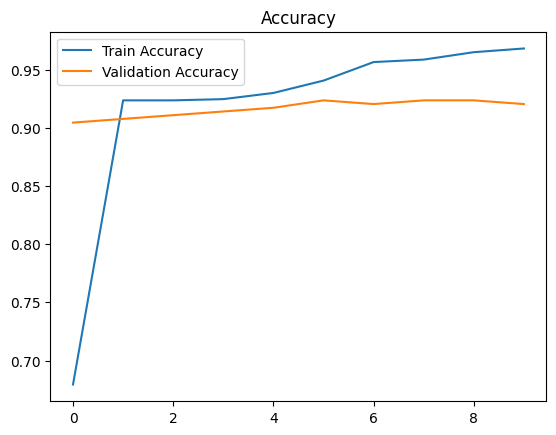

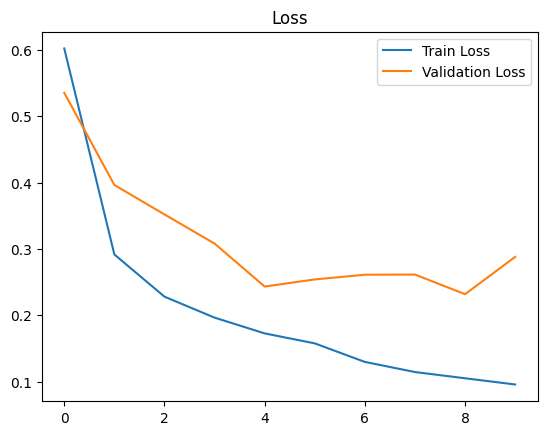

In [33]:
# Графики метрик
plt.plot(history.history['binary_accuracy'], label='Train Accuracy')
plt.plot(history.history['val_binary_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()
plt.show()

In [34]:
# Оценка модели
test_loss, test_accuracy = model.evaluate([x_test_1, x_test_2], y_test)
print(f"Test loss: {test_loss:.4f}, Test accuracy: {test_accuracy:.4f}")

10/10 [==============================] - 0s 2ms/step - loss: 0.3147 - binary_accuracy: 0.9111
Test loss: 0.3147, Test accuracy: 0.9111


In [36]:
# подключение к  google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [37]:
# сохранение лучших весов  на гугл диск
!cp -r /content/best_weights.h5 /content/drive/MyDrive/profpatolog

In [35]:
# Загрузка лучшие веса
model_best = tf.keras.models.load_model(checkpoint_filepath)

# Оценка модели с лучшими весами
test_loss, test_accuracy = model_best.evaluate([x_test_1, x_test_2], y_test)
print(f"Test loss: {test_loss:.4f}, Test accuracy: {test_accuracy:.4f}")

10/10 [==============================] - 0s 2ms/step - loss: 0.2725 - binary_accuracy: 0.9111
Test loss: 0.2725, Test accuracy: 0.9111


## Выводы
Модель, созданная мною в первом ноутбуке, дала точность 0,89. Модель, созданная на основе AutoKeras, дала точность 0,91.
Предполагаю, что надо вернуться к предобработке данных.
